In [162]:
!pip install numpy

In [163]:
!pip install category_encoders

In [164]:
!pip install sklearn

In [165]:
!pip install xgboost

# 1. Import Libraries

In [166]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# 2. Data Loading

In [167]:
df= pd.read_csv('data_california_house (1).csv')

In [168]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [170]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# 3. EDA

<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: ocean_proximity, dtype: int64

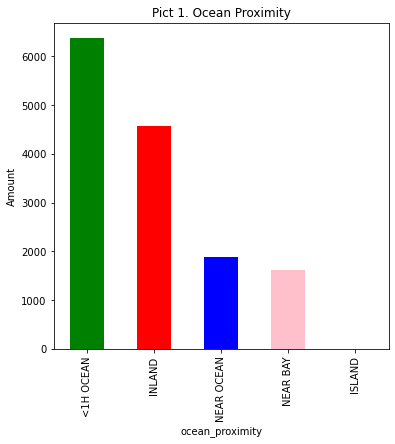

In [171]:
df['ocean_proximity'].value_counts().plot(kind='bar', figsize=(6, 6), width=0.5, color=['green','red','blue','pink','yellow'])
plt.xlabel('ocean_proximity')
plt.title('Pict 1. Ocean Proximity')
plt.ylabel('Amount')

df['ocean_proximity'].value_counts()


Pada data ada 5 jenis rumah berdasarkan jarak daratan dengan laut, jika dilihat dari grafiknya di daerah california paling banyak rumah yang jarak ke luatnya kurang dari 1 jam, dan yang paling sedikit itu rumah di pulau. emng california ada pulau? aneh

Text(0.5, 1.0, 'CLF House Group Location')

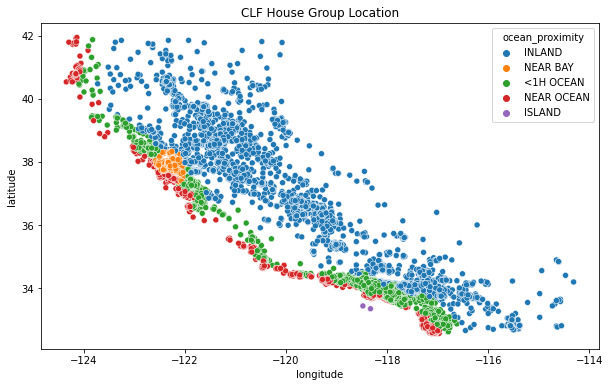

In [172]:
# Plot lokasi 'neighbourhood_group'
plt.figure(figsize=(10, 6))
sns.scatterplot(df['longitude'], df['latitude'], hue=df['ocean_proximity']).set_title('CLF House Group Location')

Berdasarkan scatterplot dapat dilohat bahwa persebaran rumah di pedalaman (Inland) sangat besar.

In [173]:
tot_pop = df.groupby("ocean_proximity", sort=False)["population"].sum().round(2)
tot_pop

ocean_proximity
INLAND        6375492.0
NEAR BAY      1959837.0
<1H OCEAN     9687368.0
NEAR OCEAN    2566454.0
ISLAND           1522.0
Name: population, dtype: float64

Text(0, 0.5, 'Amount')

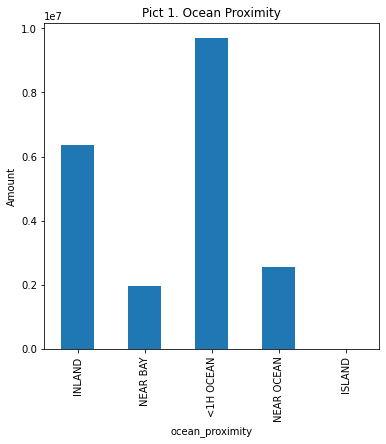

In [174]:
tot_pop.plot(kind='bar', figsize=(6, 6), width=0.5)
plt.xlabel('ocean_proximity')
plt.title('Pict 1. Ocean Proximity')
plt.ylabel('Amount')

Jumlah populasi di < 1H Ocean pling banyak diantra lainnya, dan jumlah populasi island paling sedikit.

Kolom housing_median_age memiliki nilai skewness: 0.0589291851805334


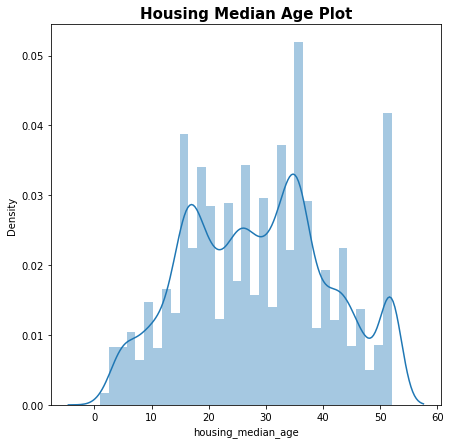

In [175]:
plt.figure(figsize=(7, 7))
sns.distplot(df['housing_median_age'])
plt.title('Housing Median Age Plot', size=15, weight='bold');
print('Kolom housing_median_age memiliki nilai skewness:',df['housing_median_age'].skew())

kalo di liat dari gambar sm nilai skewnessnya kolom housing_median_age terdistribusi secara normal

Kolom median_house_value memiliki nilai skewness: 0.9817544310070773


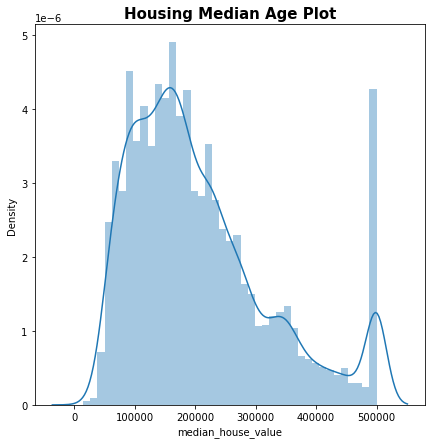

In [176]:
plt.figure(figsize=(7, 7))
sns.distplot(df['median_house_value'])
plt.title('Housing Median Age Plot', size=15, weight='bold');
print('Kolom median_house_value memiliki nilai skewness:',df['median_house_value'].skew())

In [177]:
expen_house_val= df[df['median_house_value']>499999]

In [178]:
expen_house_val['ocean_proximity'].value_counts()

<1H OCEAN     376
NEAR OCEAN    153
NEAR BAY      151
INLAND         16
Name: ocean_proximity, dtype: int64

# Data Preprocess

## Get The Data Inference

In [179]:
# Make a variable for data inference
df_inf = df.sample(100, random_state=33)

In [180]:
# Move out the data inference from the all data set
df_train_test = df.drop(df_inf.index)
df_train_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [181]:
# Reset index number from data inference and data set
df_train_test.reset_index(drop=True, inplace=True) 
df_inf.reset_index(drop=True, inplace=True)

## Split the Data

In [182]:
# Move out the target from the data set
X = df_train_test.drop(['median_house_value'], axis=1)
y = df_train_test['median_house_value']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)
print(X_train.shape)
print(X_test.shape)

(11478, 9)
(2870, 9)


## Feature Selection

In [184]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925158,-0.117501,0.057288,0.079528,0.108161,0.064218,-0.010093,-0.045777
latitude,-0.925158,1.000000,0.020830,-0.048514,-0.076796,-0.117704,-0.080046,-0.085176,-0.143957
housing_median_age,-0.117501,0.020830,1.000000,-0.367868,-0.329448,-0.299736,-0.312394,-0.120396,0.103863
total_rooms,0.057288,-0.048514,-0.367868,1.000000,0.931993,0.853460,0.919292,0.199549,0.131972
total_bedrooms,0.079528,-0.076796,-0.329448,0.931993,1.000000,0.874618,0.978561,-0.004160,0.045915
population,0.108161,-0.117704,-0.299736,0.853460,0.874618,1.000000,0.905061,0.006284,-0.026183
households,0.064218,-0.080046,-0.312394,0.919292,0.978561,0.905061,1.000000,0.016365,0.061581
median_income,-0.010093,-0.085176,-0.120396,0.199549,-0.004160,0.006284,0.016365,1.000000,0.693273
median_house_value,-0.045777,-0.143957,0.103863,0.131972,0.045915,-0.026183,0.061581,0.693273,1.000000


Based on correlation the median income give 

## Outliers Handling

In [185]:
X_train_distr = pd.DataFrame({'columns':X_train.describe().columns, 'skew' : X_train.skew(axis=0)})
X_train_distr.reset_index(drop=True, inplace=True)
X_train_distr['distribution'] = np.where((X_train_distr['skew'] < 0.5) & (X_train_distr['skew'] > - 0.5) , 'Normal', 'Skew')
X_train_distr

,columns,skew,distribution
0,longitude,-0.302204,Normal
1,latitude,0.470076,Normal
2,housing_median_age,0.057010,Normal
3,total_rooms,3.930220,Skew
4,total_bedrooms,3.339489,Skew
5,population,5.928408,Skew
6,households,3.258300,Skew
7,median_income,1.674004,Skew


In [186]:
def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower = df[variable].quantile(0.25) - distance * IQR
    upper = df[variable].quantile(0.75) + distance * IQR

    return upper, lower

In [187]:
j = 0
outliers={}
for i in X_train.describe().columns:
    if X_train_distr['distribution'].loc[(X_train_distr['columns']==i)].values[0]== 'Normal':
        upper_boundary, lower_boundary = find_normal_boundaries(X_train, i)
        print(f"Boundary Lower and Upper {i}:{lower_boundary, upper_boundary}")
        outliers[f"outliers{j}"] = np.where(X_train[i] > upper_boundary, True, np.where(X_train[i] < lower_boundary, True, False))
    else:
        upper_boundary, lower_boundary = find_skewed_boundaries(X_train, i, 1.5)
        print(f"Batas lower dan upper untuk {i}:{lower_boundary, upper_boundary}")
        outliers[f"outliers{j}"] = np.where(X_train[i] > upper_boundary, True, np.where(X_train[i] < lower_boundary, True, False))
    print("="*30)
    j+=1

Boundary Lower and Upper longitude:(-125.58043050411993, -113.53819294944333)
Boundary Lower and Upper latitude:(29.20747133312791, 42.04445757434692)
Boundary Lower and Upper housing_median_age:(-9.401009765390356, 66.61289336880559)
Batas lower dan upper untuk total_rooms:(-1127.625, 5735.375)
Batas lower dan upper untuk total_bedrooms:(-234.5, 1177.5)
Batas lower dan upper untuk population:(-633.5, 3138.5)
Batas lower dan upper untuk households:(-214.0, 1098.0)
Batas lower dan upper untuk median_income:(-0.6667375000000004, 7.9573625)


In [188]:
for i, (k, v) in enumerate(outliers.items()):
    X_train_distr_handling= X_train.loc[~outliers[k]]
    X_train_distr.loc[i,'trimmed_row'] = X_train.shape[0] - X_train_distr_handling.shape[0]
    X_train_distr.loc[i,'percentage'] = np.round(100-(X_train_distr_handling.shape[0]/X_train.shape[0]*100), 2)
    X_train_distr.loc[i,'action'] = np.where(X_train_distr.loc[i,'percentage']==0, 'No Action', 
                                        np.where(X_train_distr.loc[i,'percentage']>5, 'Capping/Windsorizer', 'Trimming'))

X_train_distr

,columns,skew,distribution,trimmed_row,percentage,action
0,longitude,-0.302204,Normal,0.0,0.00,No Action
1,latitude,0.470076,Normal,0.0,0.00,No Action
2,housing_median_age,0.057010,Normal,0.0,0.00,No Action
3,total_rooms,3.930220,Skew,715.0,6.23,Capping/Windsorizer
4,total_bedrooms,3.339489,Skew,702.0,6.12,Capping/Windsorizer
5,population,5.928408,Skew,639.0,5.57,Capping/Windsorizer
6,households,3.258300,Skew,654.0,5.70,Capping/Windsorizer
7,median_income,1.674004,Skew,388.0,3.38,Trimming


In [189]:
outliers_tot = outliers['outliers2']
for i, (k, v) in enumerate(outliers.items()):
    if i in [7]:
        outliers_tot += outliers[k]

In [190]:
X_train_trimmed = X_train.loc[~outliers_tot]
y_train_trimmed = y_train.loc[~outliers_tot]

print(f"Jumlah baris pada X_train SEBELUM di Trimming: {X_train.shape[0]}")
print(f"Jumlah baris pada X_train SETELAH di Trimming: {X_train_trimmed.shape[0]}")
print(f"% Outlier dari Keseluruhan Data: {100-(X_train_trimmed.shape[0]/X_train.shape[0]*100):.2f}%")

Jumlah baris pada X_train SEBELUM di Trimming: 11478
Jumlah baris pada X_train SETELAH di Trimming: 11090
% Outlier dari Keseluruhan Data: 3.38%


In [191]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

median_income - Before Trimming


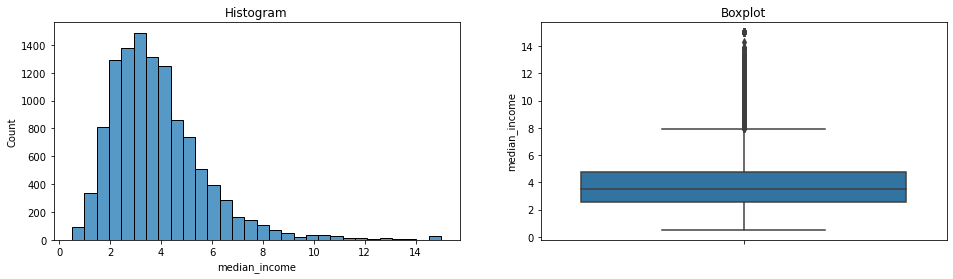


median_income - After Trimming


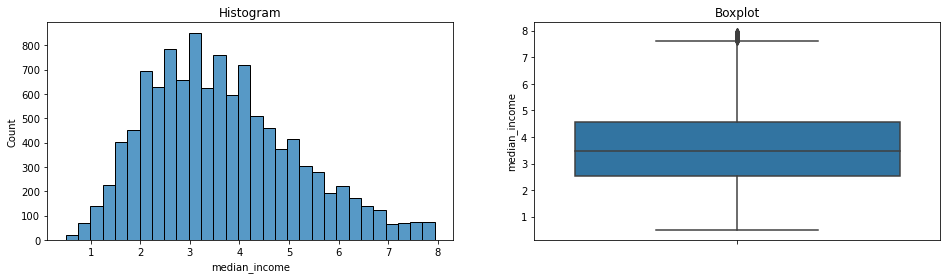

In [192]:
print('median_income - Before Trimming')
diagnostic_plots(X_train, 'median_income')
print('\nmedian_income - After Trimming')
diagnostic_plots(X_train_trimmed, 'median_income')

## Missing value Handling

In [193]:
X_train_trimmed.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        105
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [194]:
X_test.isna().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        26
population             0
households             0
median_income          0
ocean_proximity        0
dtype: int64

In [195]:
X_train_trimmed['total_bedrooms'].skew()

3.319279849230474

In [196]:
X_train_trimmed['total_bedrooms'].fillna(X_train_trimmed['total_bedrooms'].median(), inplace=True)
X_test['total_bedrooms'].fillna(X_train_trimmed['total_bedrooms'].median(), inplace=True)

## Splitting Columns (Numerical Columns and Categorical Columns)

In [197]:
# Get Numerical and Categorical Columns

num_columns = X_train_trimmed.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_trimmed.select_dtypes(include=['object']).columns.tolist()

print('Numeric Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numeric Columns :  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Categorical Columns :  ['ocean_proximity']


In [198]:
# Split on X_train

X_train_trimmed_num = X_train_trimmed[num_columns]
X_train_trimmed_cat = X_train_trimmed[cat_columns]

# Split on X_test

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

In [199]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_trimmed_num_scaled = scaler.fit_transform(X_train_trimmed_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [200]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X_train_trimmed_cat_encoded = encoder.fit_transform(X_train_trimmed_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

In [201]:
# Untuk model yang memerlukan scaler
X_train_final = np.concatenate([X_train_trimmed_num_scaled, X_train_trimmed_cat_encoded.toarray()], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded.toarray()], axis=1)

# Modeling

In [202]:
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

In [203]:
X_train_final.shape

(11090, 13)

In [204]:
y_train.shape

(11478,)

In [205]:
%timeit lr.fit(X_train_final, y_train_trimmed)
%timeit knn.fit(X_train_final, y_train_trimmed)
%timeit dt.fit(X_train_final, y_train_trimmed)
%timeit rf.fit(X_train_final, y_train_trimmed)
%timeit xgb.fit(X_train_final, y_train_trimmed)

4.63 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.31 ms ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
76.5 ms ± 85.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.75 s ± 35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1 s ± 89.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [206]:
%%time
print('----Training Set----')
print(f'Training Score: {lr.score(X_train_final, y_train_trimmed):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train_trimmed, lr.predict(X_train_final))}')
print('----Testing Set----')
print(f'Validation Score: {lr.score(X_test_final, y_test):.2f}')
print(f'Validation Mean Absolute Error (MAE): {mean_absolute_error(y_test, lr.predict(X_test_final))}')

----Training Set----
Training Score: 0.59
Training Mean Absolute Error (MAE): 49121.63033061556
----Testing Set----
Validation Score: 0.62
Validation Mean Absolute Error (MAE): 51185.14649701923
CPU times: user 9.26 ms, sys: 6.04 ms, total: 15.3 ms
Wall time: 4.59 ms


In [207]:
%%time
print('----Training Set----')
print(f'Training Score: {knn.score(X_train_final, y_train_trimmed):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train_trimmed, knn.predict(X_train_final))}')
print('----Testing Set----')
print(f'Validation Score: {knn.score(X_test_final, y_test):.2f}')
print(f'Validation Mean Absolute Error (MAE): {mean_absolute_error(y_test, knn.predict(X_test_final))}')

----Training Set----
Training Score: 0.78
Training Mean Absolute Error (MAE): 33831.60248872858
----Testing Set----
Validation Score: 0.68
Validation Mean Absolute Error (MAE): 43815.412961672475
CPU times: user 1.01 s, sys: 205 ms, total: 1.22 s
Wall time: 664 ms


In [208]:
%%time
print('----Training Set----')
print(f'Training Score: {dt.score(X_train_final, y_train_trimmed):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train_trimmed, dt.predict(X_train_final))}')
print('----Testing Set----')
print(f'Validation Score: {dt.score(X_test_final, y_test):.2f}')
print(f'Validation Mean Absolute Error (MAE): {mean_absolute_error(y_test, dt.predict(X_test_final))}')

----Training Set----
Training Score: 1.00
Training Mean Absolute Error (MAE): 0.0
----Testing Set----
Validation Score: 0.60
Validation Mean Absolute Error (MAE): 46143.008362369335
CPU times: user 7.54 ms, sys: 1.49 ms, total: 9.02 ms
Wall time: 8.77 ms


In [209]:
%%time
print('----Training Set----')
print(f'Training Score: {rf.score(X_train_final, y_train_trimmed):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train_trimmed, rf.predict(X_train_final))}')
print('----Testing Set----')
print(f'Validation Score: {rf.score(X_test_final, y_test):.2f}')
print(f'Validation Mean Absolute Error (MAE): {mean_absolute_error(y_test, rf.predict(X_test_final))}')

----Training Set----
Training Score: 0.97
Training Mean Absolute Error (MAE): 12320.645972948603
----Testing Set----
Validation Score: 0.78
Validation Mean Absolute Error (MAE): 35123.22231358885
CPU times: user 460 ms, sys: 5.36 ms, total: 466 ms
Wall time: 464 ms


In [210]:
%%time
print('----Training Set----')
print(f'Training Score: {xgb.score(X_train_final, y_train_trimmed):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train_trimmed, xgb.predict(X_train_final))}')
print('----Testing Set----')
print(f'Validation Score: {xgb.score(X_test_final, y_test):.2f}')
print(f'Validation Mean Absolute Error (MAE): {mean_absolute_error(y_test, xgb.predict(X_test_final))}')

----Training Set----
Training Score: 0.94
Training Mean Absolute Error (MAE): 18255.33301380044
----Testing Set----
Validation Score: 0.80
Validation Mean Absolute Error (MAE): 33259.6850888774
CPU times: user 101 ms, sys: 16.8 ms, total: 118 ms
Wall time: 27.4 ms


##### Kesimpulan analakysis

Model Xgost adalah paling b ik. Meskipun underfittimg, namun nilai MAE menunjukkan yang paling kecil diantara lainnya.